# **Praktikum DBSCAN**

## **Import Library**

In [ ]:
import numpy as np                          # Untuk operasi aljabar linier
import pandas as pd                         # Untuk manipulasi data seperti CSV file I/O
import matplotlib.pyplot as plt             # Untuk visualisasi data
from sklearn.cluster import KMeans          # Untuk algoritma KMeans
from sklearn.cluster import DBSCAN          # Untuk membuat DBScan
from sklearn.preprocessing import StandardScaler       # Untuk normalisasi data
from scipy.cluster.hierarchy import dendrogram, linkage# Untuk klustering hierarkis
from sklearn.ensemble import RandomForestClassifier    # Untuk Seleksi Fitur RandomForest
from sklearn.feature_selection import SelectFromModel# Untuk Pemilihan Fitur
from sklearn.metrics import silhouette_score         # Untuk klustering siheulette
from sklearn.cluster import KMeans                   # Untuk Klustering K-Means
import scipy.cluster.hierarchy as sch                # Untuk klustering hierarkis
import seaborn as sns                                # Untuk membuat boxplot
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import NearestNeighbors       # Untuk membuat KNearest Neighbor

## **Import Dataset**

In [ ]:
data = pd.read_csv('/content/laptop_data_cleaned.csv')
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
# Memilih hanya kolom yang berisi angka
df = data.select_dtypes(include=['number'])
df.head()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
0,8,1.37,11.175755,0,1,226.983005,0,128
1,8,1.34,10.776777,0,0,127.677940,0,0
2,8,1.86,10.329931,0,0,141.211998,0,256
3,16,1.83,11.814476,0,1,220.534624,0,512
4,8,1.37,11.473101,0,1,226.983005,0,256


## **Data Exploration**

#### DataFrame Shape

In [ ]:
df.shape

(1273, 8)

#### DataFrame Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ram          1273 non-null   int64  
 1   Weight       1273 non-null   float64
 2   Price        1273 non-null   float64
 3   TouchScreen  1273 non-null   int64  
 4   Ips          1273 non-null   int64  
 5   Ppi          1273 non-null   float64
 6   HDD          1273 non-null   int64  
 7   SSD          1273 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 79.7 KB


### Check Data Types

In [ ]:
df.dtypes

Ram              int64
Weight         float64
Price          float64
TouchScreen      int64
Ips              int64
Ppi            float64
HDD              int64
SSD              int64
dtype: object

### Check Missing Value

In [ ]:
df.isna().any()

Ram            False
Weight         False
Price          False
TouchScreen    False
Ips            False
Ppi            False
HDD            False
SSD            False
dtype: bool

#### Interpretasi:

Tidak ada missing value pada data

### Check Outlier

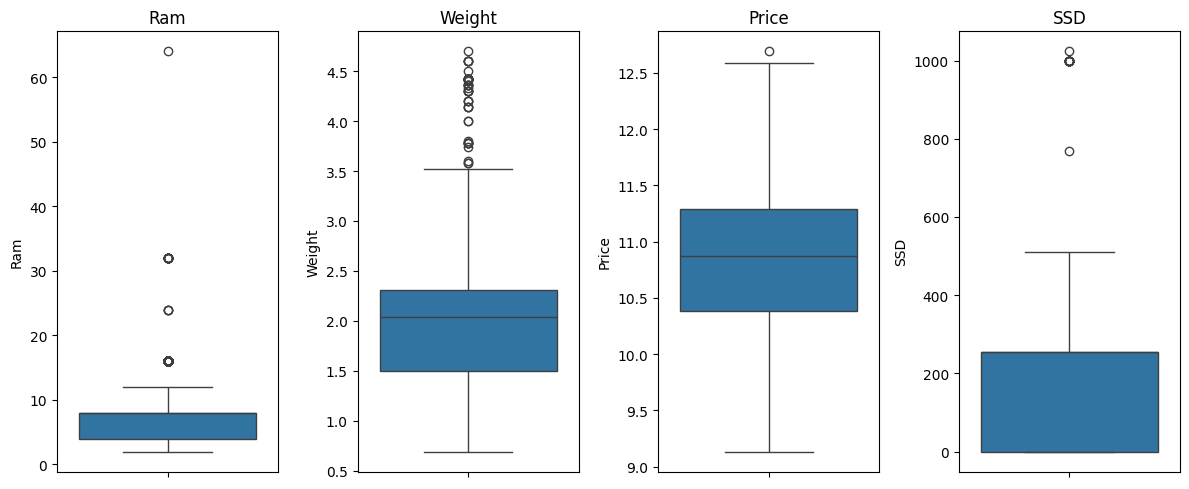

In [ ]:
# Membuat boxplot untuk setiap kolom numerik pada dataset menggunakan seaborn
fig, axs = plt.subplots(1, 4, figsize=(12, 5))  # Mengatur subplot menjadi 1 baris dan 4 kolom

# Membuat boxplot untuk setiap kolom numerik pada dataset
sns.boxplot(data=df['Ram'], ax=axs[0])
sns.boxplot(data=df['Weight'], ax=axs[1])
sns.boxplot(data=df['Price'], ax=axs[2])
sns.boxplot(data=df['SSD'], ax=axs[3])

# Menetapkan judul untuk setiap subplot
axs[0].set_title('Ram')
axs[1].set_title('Weight')
axs[2].set_title('Price')
axs[3].set_title('SSD')

# Menghilangkan axis yang tidak diperlukan
for ax in axs.flat:
    ax.set(xlabel='')

plt.tight_layout()
plt.show()

## **Clustering**

### Elbow Method

In [ ]:
# Menerapkan metode Elbow untuk menentukan jumlah kluster optimal
wcss = []
for i in range(1, 4):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

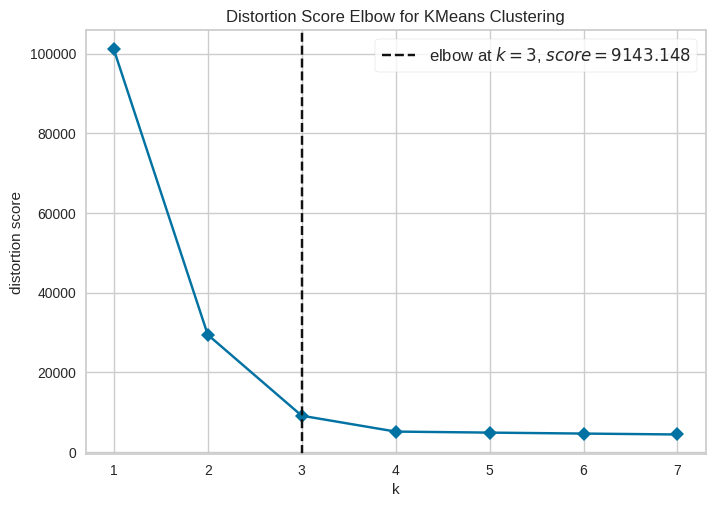

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Generate synthetic data for demonstration purposes
df, _ = make_blobs(n_samples=1273, centers=4, random_state=42, n_features=8)
# Select only variables 3 and 4
X = df[:, [0,1,2,7]]
# Using the KElbowVisualizer from yellowbrick
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 8), timings=False)

# Pass the selected features to the fit method
visualizer.fit(X)
visualizer.show()

#### Interpretasi:
Jumlah klaster (k) yang didapatkan adalah 3

### K-Neareast Neighbors Method

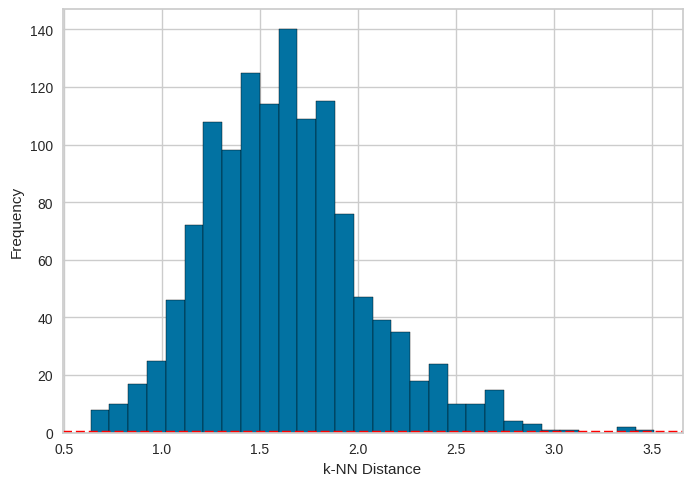

In [ ]:
def kNNdistplot(df, k=3):
    # Menghitung jarak k-Nearest Neighbors
    nbrs = NearestNeighbors(n_neighbors=k).fit(df)
    distances, indices = nbrs.kneighbors(df)

    # Mengambil jarak terakhir dari setiap titik ke k-th neighbor terdekat
    k_distances = distances[:, k-1]

    # Membuat plot
    plt.hist(k_distances, bins=30, edgecolor='black')
    plt.ylabel('Frequency')
    plt.xlabel('k-NN Distance')

    # Menambahkan garis horizontal
    plt.axhline(y=0.15, color='red', linestyle='--')
    plt.show()

kNNdistplot(df, k=2)


#### Interpretasi
Mayoritas data memiliki jarak KNN yang relatif rendah, menunjukkan bahwa data tersebut tercluster dengan baik


### K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


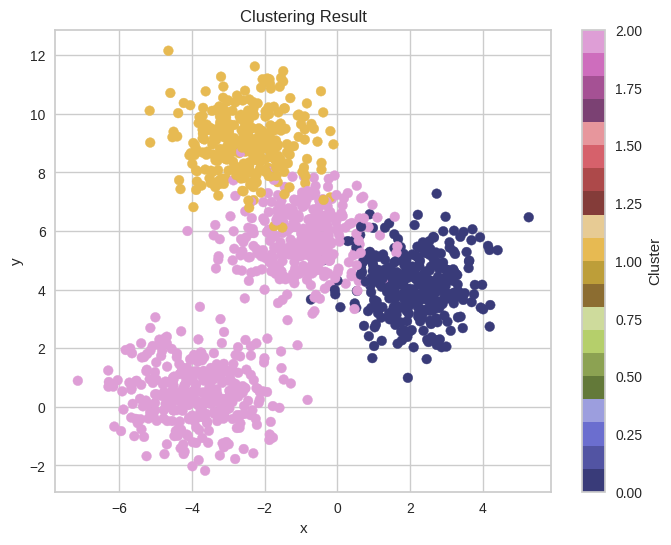

In [ ]:
multishapes = pd.DataFrame(df)

kmeans = KMeans(n_clusters=3)
df_clust = kmeans.fit_predict(multishapes)

# Menambahkan kolom klaster ke DataFrame
multishapes['clust'] = df_clust

# Membuat plot
plt.figure(figsize=(8, 6))
plt.scatter(multishapes[0], multishapes[1], c=multishapes['clust'], cmap='tab20b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clustering Result')
plt.colorbar(label='Cluster')
plt.show()

#### Interpretasi:

Dari hasil visualisasi tersebut, dapat dilihat bahwa K-Means Clustering menghasilkan 3 cluster yang dibedakan berdasarkan warna. Warna Biru menunjukkan rendahnya tingkat cluster, warna kuning menunjukkan netral atau seimbangnya tingkat cluster, dan warna merah muda menunjukkan tingkat cluster yang tinggi. Tingkatan tersebut dilihat berdasarkan acuan warna cluster yang terdapat di sebelah kanan visualisasi.

### Knee Method

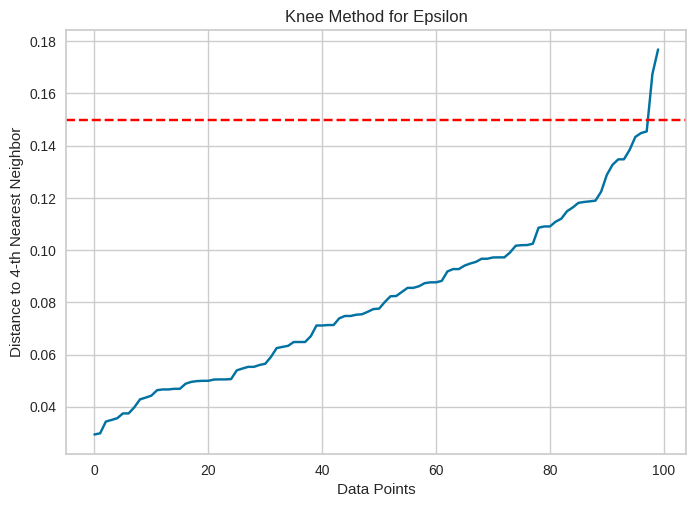

Optimal Epsilon: 0.16745359519291517


In [ ]:
# Generate random data
np.random.seed(0)
data = np.random.rand(100, 2)

# Compute distances to nearest neighbors
k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(data)
distances, _ = nn.kneighbors(data)
distances = np.sort(distances[:,k-1], axis=0)

# Plot the distances
plt.plot(distances)
plt.axhline(y=0.15, color='red', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Distance to {}-th Nearest Neighbor'.format(k+1))
plt.title('Knee Method for Epsilon')
plt.show()

# Find the knee/elbow point
knee_point = np.argmax(np.gradient(distances))
epsilon = distances[knee_point]

print(f'Optimal Epsilon: {epsilon}')


#### Interpretasi:
Nilai optimal epsilon yang didapatkan dengan Knee Method yaitu 0.167

### DBSCAN Clustering Analysis

In [ ]:
np.random.seed(0)
data = np.random.rand(1273, 4)

# Rentang nilai untuk parameter
eps_values = np.arange(0.1, 0.5, 0.05)  # Menyesuaikan jarak epsilon
min_samples_values = range(3, 10)  # Menyesuaikan jumlah minPts

# Untuk menyimpan hasil
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Jumlah kluster dan titik noise
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        results.append((eps, min_samples, n_clusters, n_noise))

# Mencetak hasil
for res in results:
    print(f"eps: {res[0]}, min_samples: {res[1]}, clusters: {res[2]}, noise points: {res[3]}")


eps: 0.1, min_samples: 3, clusters: 72, noise points: 1006
eps: 0.1, min_samples: 4, clusters: 18, noise points: 1197
eps: 0.1, min_samples: 5, clusters: 3, noise points: 1257
eps: 0.1, min_samples: 6, clusters: 1, noise points: 1267
eps: 0.1, min_samples: 7, clusters: 0, noise points: 1273
eps: 0.1, min_samples: 8, clusters: 0, noise points: 1273
eps: 0.1, min_samples: 9, clusters: 0, noise points: 1273
eps: 0.15000000000000002, min_samples: 3, clusters: 37, noise points: 163
eps: 0.15000000000000002, min_samples: 4, clusters: 50, noise points: 306
eps: 0.15000000000000002, min_samples: 5, clusters: 50, noise points: 495
eps: 0.15000000000000002, min_samples: 6, clusters: 42, noise points: 761
eps: 0.15000000000000002, min_samples: 7, clusters: 24, noise points: 989
eps: 0.15000000000000002, min_samples: 8, clusters: 15, noise points: 1102
eps: 0.15000000000000002, min_samples: 9, clusters: 5, noise points: 1213
eps: 0.20000000000000004, min_samples: 3, clusters: 1, noise points: 8
ep

### DBSCAN Clustering Results Summary(Iterary 1)

Estimated number of clusters: 7
Estimated number of noise points: 29


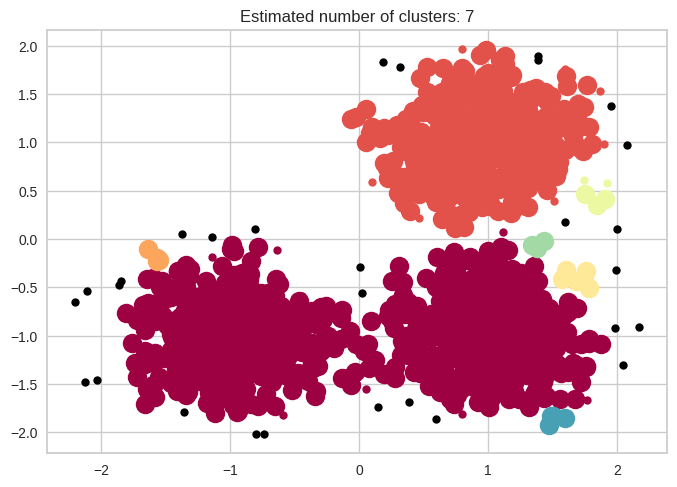

In [ ]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=1273, centers=centers, cluster_std=0.4, random_state=0)

# Compute DBSCAN
db = DBSCAN(eps=0.167, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#### Interpretasi:

Hasil clustering DBSCAN dengan parameter eps 0.167 dan min_sample 3 didapatkan estimasi cluster sebanyak 7 dan noise sebanyak 29.

### DBSCAN Clustering Results Summary(Iterary 2)

Estimated number of clusters: 3
Estimated number of noise points: 20


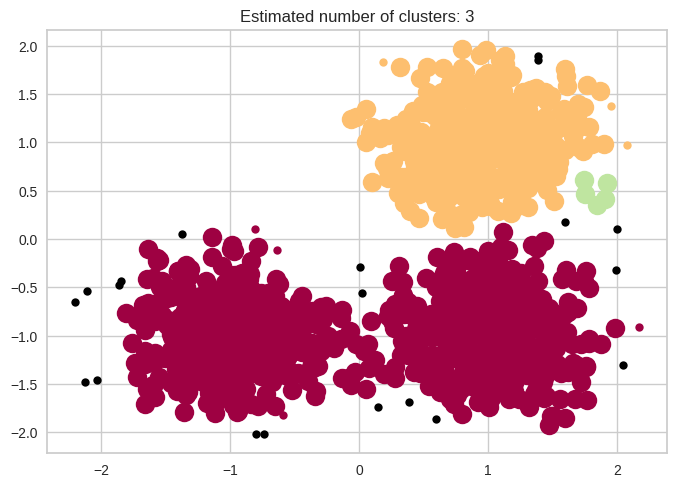

In [ ]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=1273, centers=centers, cluster_std=0.4, random_state=0)

# Compute DBSCAN
db = DBSCAN(eps=0.2, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#### Interpretasi:

Hasil clustering DBSCAN dengan parameter eps yang diubah menjadi 0.2 menghasilkan 3 cluster dan 20 noise points. Perubahan ini mengakibatkan jumlah cluster berkurang menjadi 3 dari 7 cluster dan jumlah noise points berkurang menjadi 20, dari 29 noise points pada clustering sebelumnya.
Pada cluster yang terbentuk, menunjukkan bahwa mayoritas data telah terkumpul dalam satu cluster tunggal. Hal ini menunjukkan bahwa dengan peningkatan nilai epsilon, algoritma DBSCAN lebih cenderung untuk menggabungkan titik-titik yang lebih dekat menjadi satu kelompok.